By Leah Vieira
For Earth Systems Modeling Term Project (Fall 2023)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [103]:
dt = 2 #hr
dx = 10 # km
u = 4.8 #km/hr

#Define Courant number
C = u *(dt/dx)

#set domain
n_length = 100
j_length = 30

## Advection Equation, explicit method

In [104]:
#Set boundary conditions and initialize matrix
N = np.zeros((30,100)) # j_length, n_length
N[0,:] = 32 #mmol/L;

#set rate of change for each index
rate_of_change = -0.135

for n in range(0,n_length-2):
    for j in range(1,j_length-2):
        if N[j, n] >= 0:
         #   # Update the concentration with the desired rate of change
            N[j, n+1] = N[j,n] - C*(N[j,n] - N[j-1,n]) + rate_of_change * (dx)
        else:
            # If the concentration is already zero, break out of the loop
            break
            
T_adv = T

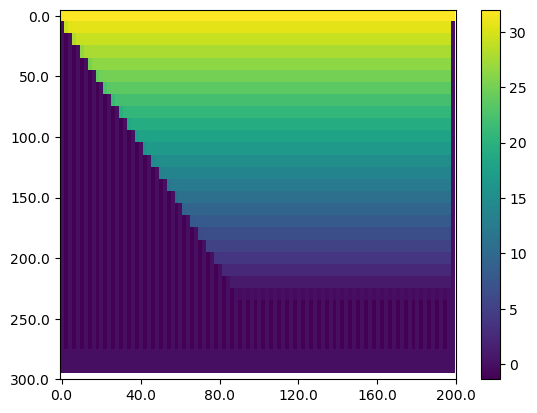

In [106]:
c= plt.imshow(N, aspect= "auto")
plt.colorbar(c)
plt.xticks(ticks=plt.xticks()[0][1:], labels=2 * np.array(plt.xticks()[0][1:], dtype=np.float64))
plt.yticks(ticks=plt.yticks()[0][1:], labels=10 * np.array(plt.yticks()[0][1:], dtype=np.float64))
plt.show()

## Diffusion Equation, explicit method

In [107]:
N = np.zeros((30,100))
N[0,:]= 32

#set calculated turbulent diffusivity value
eta= 6.4

rate_of_change = -0.135

#compute each time step and spatial step
for n in range(1,n_length-1):
    for j in range(1,j_length-1):
        N[j,n+1] = eta*dt*((N[j+1,n]-2*N[j,n]+N[j-1,n])/(dx**2)) + N[j,n]
        

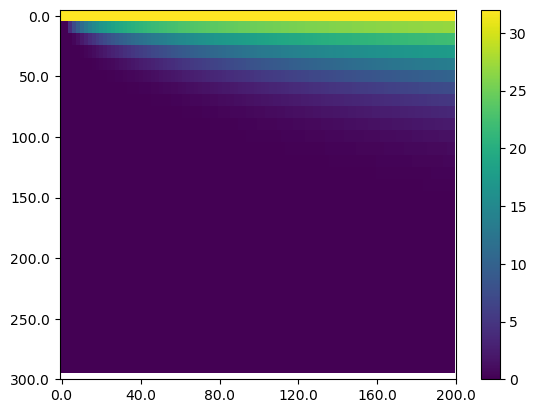

In [108]:
c= plt.imshow(N, aspect= "auto")
plt.colorbar(c)
plt.xticks(ticks=plt.xticks()[0][1:], labels=2 * np.array(plt.xticks()[0][1:], dtype=np.float64))
plt.yticks(ticks=plt.yticks()[0][1:], labels=10 * np.array(plt.yticks()[0][1:], dtype=np.float64))
plt.show()

## Advection and Diffusion, explicit method

In [109]:
#Set boundary conditions and initialize matrix

N = np.zeros((30,100)) # j_length, n_length
N[0,:] = 32 #mmol/L;

rate_of_change = -0.135

for n in range(0,n_length-2):
    for j in range(1,j_length-2):
        
        if N[j, n] >= 0:
         #   # Update the concentration with the desired rate of change
            N[j, n+1] = eta*dt*((N[j+1,n]-2*N[j,n]+N[j-1,n])/(dx**2)) - C*(N[j,n] - N[j-1,n]) + N[j,n] + rate_of_change * (dx)
        else:
            # If the concentration is already zero, break out of the loop
            break
            


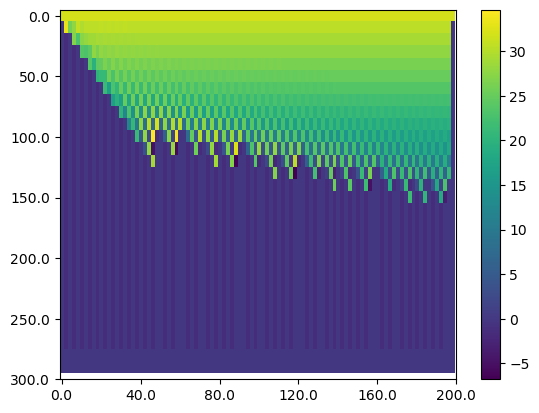

In [110]:
c= plt.imshow(N, aspect= "auto")
plt.colorbar(c)
plt.xticks(ticks=plt.xticks()[0][1:], labels=2 * np.array(plt.xticks()[0][1:], dtype=np.float64))
plt.yticks(ticks=plt.yticks()[0][1:], labels=10 * np.array(plt.yticks()[0][1:], dtype=np.float64))
plt.show()

In [111]:
T[22,85]

0.0

## Thomas Algorithm

In [112]:
def thomas(d, a, b, y, n):
    
    a_prime = np.zeros(n-1)
    y_2prime = np.zeros(n)
    
    #up the ladder
    #first row
    a_prime[0] = a[0]/d[0]
    y_2prime[0] = y[0]/d[0]
    
    #iterate through other rows
    #row 2 to row n-1
    for i in range(1,n-1):
        a_prime[i] = a[i]/(d[i]-(b[i]*a_prime[i-1]))
        y_2prime[i] = (y[i]-(b[i]*y_2prime[i-1]))/(d[i]-(b[i]*a_prime[i-1]))
        
    #last row
    y_2prime[n-1] = (y[n-1]-(b[n-1]*y_2prime[n-2]))/(d[n-1]-(b[n-1]*a_prime[n-2]))
    
    #down the ladder
    #initialize x array
    x = np.zeros(n)
    
    #bottom row
    x[n-1] = y_2prime[n-1]
    
    #all other rows
    for i in range(n-2,-1,-1):
        x[i] = y_2prime[i]-(a_prime[i]*(x[i+1]))
        
    return x, a_prime,y_2prime

## Advection Equation, implicit method



In [113]:
j_length = 30

#Courant number
C = u *(dt/dx)

#create main diagonal
d = []
for i in range(j_length):
    d.append(C+1)

#create above and below diagonals
a = []
b = []
b.append(0)
a.append(0)
for i in range(1,j_length-1):
    a.append(0)
    b.append(-C)
b.append(-C)
a.append(0)

y = np.zeros(j_length)
y[0]= 32


rate_of_change = -0.135

#Create an array that every N solution will be added to
N_arr = np.empty((0, j_length))
N_arr = np.vstack((N_arr, y))

N, _,_ = thomas(d, a, b, y, j_length)
N[N > 0] += rate_of_change * (dx)

N_arr = np.vstack((N_arr, N))


for _ in range(1,n_length):
    y = N
    #add initial concentration
    y[0] = 32
    N, _, _ = thomas(d, a, b, y, j_length)
    #apply the rate of change only to nonzero values
    N[N > 0] += rate_of_change * (dx)
    N[0] = 32
    N_arr = np.vstack((N_arr, N))



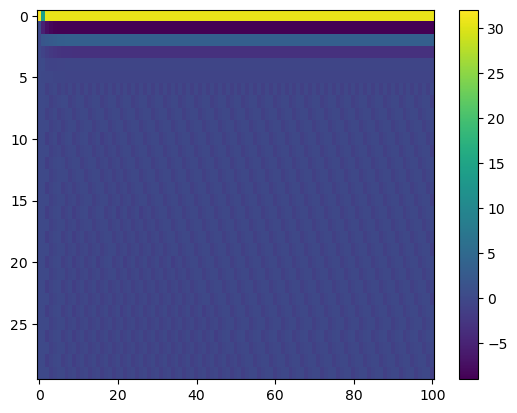

In [114]:
c= plt.imshow(np.transpose(T_arr), aspect= "auto")
plt.colorbar(c)
#plt.xticks(ticks=plt.xticks()[0][1:], labels=2 * np.array(plt.xticks()[0][1:], dtype=np.float64))
#plt.yticks(ticks=plt.yticks()[0][1:], labels=10 * np.array(plt.yticks()[0][1:], dtype=np.float64))
plt.show()

## Diffusion Equation, implicit method

In [117]:
#Fourier number
D = eta*dt/dx**2 
j_length = 30

d = []
for i in range(j_length):
    d.append(1+(2*D))

a = []
b = []
b.append(0)
a.append(-D)
for i in range(1,j_length-1):
    a.append(-D)
    b.append(-D)
b.append(-D)
a.append(0)

y = np.zeros(j_length)
#Add intial concentration
y[0] = 32

N_arr = np.empty((0, j_length))
N_arr = np.vstack((N_arr, y))

N, a_prime,y_2prime = thomas(d, a, b, y, j_length)
N_arr = np.vstack((N_arr, N))

for _ in range(1,n_length):
    y = N
    y[0] = 32
    N, _,_ = thomas(d, a, b, y, j_length)
    N[0] = 32
    N_arr = np.vstack((N_arr, N))


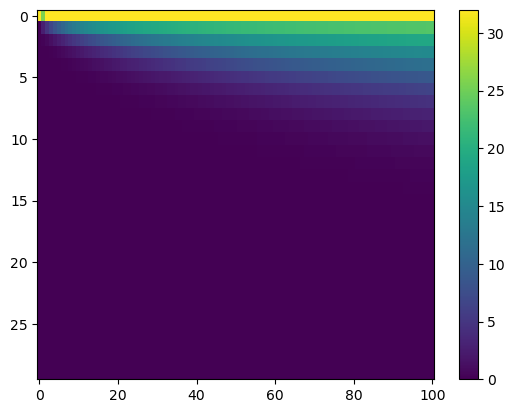

In [118]:
c= plt.imshow(np.transpose(N_arr), aspect= "auto")
plt.colorbar(c)
#plt.xticks(ticks=plt.xticks()[0][1:], labels=2 * np.array(plt.xticks()[0][1:], dtype=np.float64))
#plt.yticks(ticks=plt.yticks()[0][1:], labels=10 * np.array(plt.yticks()[0][1:], dtype=np.float64))
#plt.show()

## Advection/Diffusion Equation, implicit method

In [94]:
j_length = 30
C = u *(dt/dx)

d = []
for i in range(j_length):
    d.append(2*D + 1 + C)

a = []
b = []
b.append(0)
a.append(-D)
for i in range(1,j_length-1):
    a.append(-D)
    b.append(-D+C)
b.append(-D+C)
a.append(0)

y = np.zeros(j_length)
y[0]= 32

rate_of_change = -0.135

N_arr = np.empty((0, j_length))
N_arr = np.vstack((N_arr, y))

N, _,_ = thomas(d, a, b, y, j_length)
#T[T > 0] += rate_of_change * (dx)

N_arr = np.vstack((N_arr, N))

for _ in range(1,n_length):
    y = N
    y[0] = 32
    N, _, _ = thomas(d, a, b, y, j_length)
    N[0] = 32
    N[N > 0] += rate_of_change * (dx)
    N_arr = np.vstack((N_arr, N))
 


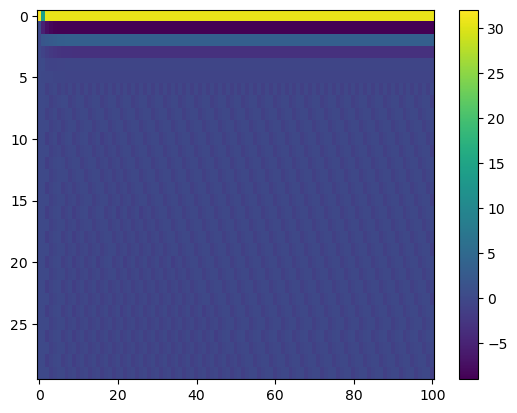

In [95]:
c= plt.imshow(np.transpose(N_arr), aspect= "auto")
plt.colorbar(c)
#plt.xticks(ticks=plt.xticks()[0][1:], labels=2 * np.array(plt.xticks()[0][1:], dtype=np.float64))
#plt.yticks(ticks=plt.yticks()[0][1:], labels=10 * np.array(plt.yticks()[0][1:], dtype=np.float64))
#plt.show()